In [194]:
import pandas as pd
import numpy as np


In [203]:
import cv2
import pathlib
import imageio
from skimage.transform import resize


training_paths = pathlib.Path('../input/chest-xray-pneumonia/chest_xray').glob('train/NORMAL/*.jpeg')
training_sorted = sorted([x for x in training_paths])

training_images = np.zeros(2352)
for index in range(301):
    im_path = training_sorted[index]
    img = cv2.imread(str(im_path))
    res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res = res.flatten()
    print(index)
    training_images = np.vstack((training_images, res))
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [204]:
training_paths = pathlib.Path('../input/chest-xray-pneumonia/chest_xray').glob('train/PNEUMONIA/*.jpeg')
training_sorted = sorted([x for x in training_paths])

training_images_affected = np.zeros(2352)
for index in range(301):
    im_path = training_sorted[index]
    img = cv2.imread(str(im_path))
    res = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    res = res.flatten()
    print(index)
    training_images_affected = np.vstack((training_images_affected, res))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [240]:
#copying and removing unnecessary rows


train_images_dummy = training_images
train_images_aff_dummy = training_images_affected

train_images_dummy = train_images_dummy[2:]
train_images_aff_dummy = train_images_aff_dummy[2:]

In [241]:
#concatenating the pixel values into the data frame


dfcop = train_images_dummy
dfcop = np.concatenate([dfcop, train_images_aff_dummy])
dfcop

df_images = pd.DataFrame(dfcop)
df_images = pd.DataFrame(df_images.loc[:, :])

In [242]:
#copying to a new dataframe

df = pd.DataFrame(df_images)
df = pd.DataFrame(df.loc[:, :])


In [208]:
df

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,32.0,32.0,32.0,57.0,57.0,57.0,103.0,103.0,103.0,121.0,...,107.0,88.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,54.0,54.0,54.0,80.0,80.0,80.0,83.0,...,133.0,86.0,86.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50.0,50.0,50.0,79.0,79.0,79.0,101.0,101.0,101.0,114.0,...,154.0,74.0,74.0,74.0,0.0,0.0,0.0,11.0,11.0,11.0
3,89.0,89.0,89.0,56.0,56.0,56.0,42.0,42.0,42.0,47.0,...,119.0,141.0,141.0,141.0,41.0,41.0,41.0,0.0,0.0,0.0
4,59.0,59.0,59.0,81.0,81.0,81.0,148.0,148.0,148.0,144.0,...,168.0,138.0,138.0,138.0,76.0,76.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,54.0,54.0,54.0,136.0,136.0,136.0,153.0,153.0,153.0,122.0,...,149.0,23.0,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
596,40.0,40.0,40.0,108.0,108.0,108.0,97.0,97.0,97.0,69.0,...,76.0,18.0,18.0,18.0,36.0,36.0,36.0,36.0,36.0,36.0
597,0.0,0.0,0.0,24.0,24.0,24.0,61.0,61.0,61.0,78.0,...,131.0,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,58.0,58.0,58.0,78.0,...,148.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
#adding target column

normal = 300
affected = 300

temp = pd.DataFrame()
temp = np.ones(normal)
temp = np.concatenate([temp, np.zeros(affected)])
temp = pd.DataFrame(temp) 


# df = pd.DataFrame(temp)
# df = pd.DataFrame(df.loc[:, 0])
# df.columns = ['target']
# df.target.value_counts()

df['target'] = pd.DataFrame(temp)

In [215]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,target
0,32.0,32.0,32.0,57.0,57.0,57.0,103.0,103.0,103.0,121.0,...,88.0,88.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,54.0,54.0,54.0,80.0,80.0,80.0,83.0,...,86.0,86.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,50.0,50.0,50.0,79.0,79.0,79.0,101.0,101.0,101.0,114.0,...,74.0,74.0,74.0,0.0,0.0,0.0,11.0,11.0,11.0,1.0
3,89.0,89.0,89.0,56.0,56.0,56.0,42.0,42.0,42.0,47.0,...,141.0,141.0,141.0,41.0,41.0,41.0,0.0,0.0,0.0,1.0
4,59.0,59.0,59.0,81.0,81.0,81.0,148.0,148.0,148.0,144.0,...,138.0,138.0,138.0,76.0,76.0,76.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,54.0,54.0,54.0,136.0,136.0,136.0,153.0,153.0,153.0,122.0,...,23.0,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,40.0,40.0,40.0,108.0,108.0,108.0,97.0,97.0,97.0,69.0,...,18.0,18.0,18.0,36.0,36.0,36.0,36.0,36.0,36.0,0.0
597,0.0,0.0,0.0,24.0,24.0,24.0,61.0,61.0,61.0,78.0,...,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,58.0,58.0,58.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
#shuffling the rows

df = df.sample(frac=1, axis=0).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,target
0,43.0,43.0,43.0,65.0,65.0,65.0,247.0,247.0,247.0,54.0,...,126.0,126.0,126.0,66.0,66.0,66.0,1.0,1.0,1.0,0.0
1,10.0,10.0,10.0,0.0,0.0,0.0,30.0,30.0,30.0,39.0,...,144.0,144.0,144.0,79.0,79.0,79.0,29.0,29.0,29.0,0.0
2,4.0,4.0,4.0,50.0,50.0,50.0,64.0,64.0,64.0,129.0,...,119.0,119.0,119.0,22.0,22.0,22.0,0.0,0.0,0.0,1.0
3,39.0,39.0,39.0,110.0,110.0,110.0,157.0,157.0,157.0,149.0,...,0.0,0.0,0.0,0.0,0.0,0.0,250.0,250.0,250.0,0.0
4,111.0,111.0,111.0,255.0,255.0,255.0,72.0,72.0,72.0,255.0,...,184.0,184.0,184.0,160.0,160.0,160.0,138.0,138.0,138.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,64.0,64.0,64.0,38.0,38.0,38.0,0.0,0.0,0.0,0.0,...,165.0,165.0,165.0,138.0,138.0,138.0,102.0,102.0,102.0,1.0
596,53.0,53.0,53.0,87.0,87.0,87.0,115.0,115.0,115.0,67.0,...,138.0,138.0,138.0,73.0,73.0,73.0,0.0,0.0,0.0,1.0
597,109.0,109.0,109.0,76.0,76.0,76.0,86.0,86.0,86.0,81.0,...,138.0,138.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
598,4.0,4.0,4.0,15.0,15.0,15.0,72.0,72.0,72.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
#diving rows into training and testing

size = len(df)
training_set = df.loc[0: 0.8*size,]
testing_set = df.loc[0.8*size:, ]


training = np.array(training_set, dtype = 'float32')
testing = np.array(testing_set, dtype = 'float32')
training.shape

(481, 2353)

In [254]:
#separating xtrain and ytrain


ytrain = training[:, -1]
xtrain = training[:, :-1]

In [257]:
#separating xtest and ytest

ytest = testing[:, -1]
xtest = testing[:, :-1]

In [259]:
#normalizing the values between 0-1

xtrain = xtrain/255
xtest = xtest/255

In [262]:
#splitting into train and validation set


from sklearn.model_selection import train_test_split


xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 42)
xtrain.shape

(307, 2352)

In [263]:
xtrain.shape[0]

307

In [264]:
xtrain = xtrain.reshape(xtrain.shape[0], *(28,28,3))
xval = xval.reshape(xval.shape[0], *(28,28,3))
xtest = xtest.reshape(xtest.shape[0], *(28,28,3))

In [266]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard



In [306]:
model = Sequential()
model.add(Conv2D(24,3,3, input_shape = (28,28,3), activation = 'elu'))
model.add(Conv2D(36,3,3, activation = 'elu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(36,3,3,  activation = 'elu'))

# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(output_dim = 64, activation = 'relu'))
model.add(Dense(output_dim = 32, activation = 'relu'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), input_shape=(28, 28, 3..., activation="elu")`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (3, 3), activation="elu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (3, 3), activation="elu")`
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # This is added back

In [307]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.005), metrics = ['accuracy'])

In [308]:
history = model.fit(xtrain, 
          ytrain,
          batch_size = 150,
          epochs = epochs,
          verbose = 1,
          validation_data = (xval, yval))

Train on 307 samples, validate on 77 samples
Epoch 1/50
307/307 [==============================] - 1s 2ms/step - loss: 0.9104 - accuracy: 0.4430 - val_loss: 0.9052 - val_accuracy: 0.5065
Epoch 2/50
307/307 [==============================] - 0s 931us/step - loss: 0.8511 - accuracy: 0.4658 - val_loss: 5.4153 - val_accuracy: 0.4935
Epoch 3/50
307/307 [==============================] - 0s 943us/step - loss: 3.7223 - accuracy: 0.5179 - val_loss: 0.9825 - val_accuracy: 0.4935
Epoch 4/50
307/307 [==============================] - 0s 950us/step - loss: 0.9181 - accuracy: 0.5147 - val_loss: 0.6792 - val_accuracy: 0.4935
Epoch 5/50
307/307 [==============================] - 0s 967us/step - loss: 0.7587 - accuracy: 0.4788 - val_loss: 1.2437 - val_accuracy: 0.5065
Epoch 6/50
307/307 [==============================] - 0s 987us/step - loss: 0.9701 - accuracy: 0.6221 - val_loss: 1.2517 - val_accuracy: 0.5065
Epoch 7/50
307/307 [==============================] - 0s 976us/step - loss: 0.9835 - accuracy

Text(0.5, 0, 'Epoch')

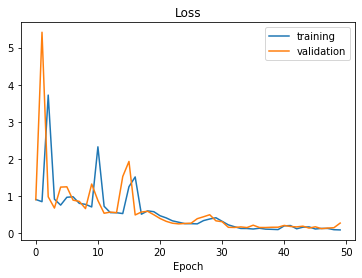

In [309]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [315]:
ypred = model.predict(xtest)
print(ypred)

[[9.99622583e-01]
 [9.99700427e-01]
 [1.30607504e-02]
 [9.99702513e-01]
 [9.79632735e-01]
 [6.86357636e-03]
 [9.90578711e-01]
 [4.43116650e-02]
 [9.99595225e-01]
 [9.95881915e-01]
 [5.96288085e-01]
 [9.78452623e-01]
 [9.93336439e-01]
 [9.77945268e-01]
 [4.73108627e-02]
 [1.43568788e-04]
 [9.99118745e-01]
 [1.13151394e-01]
 [9.98664141e-01]
 [9.99884009e-01]
 [9.30463314e-01]
 [9.99245644e-01]
 [8.42376530e-01]
 [9.99935627e-01]
 [9.80392039e-01]
 [9.98759985e-01]
 [2.46073265e-04]
 [4.69891697e-01]
 [9.98805761e-01]
 [1.16386287e-01]
 [9.99898911e-01]
 [8.14449787e-01]
 [9.99903321e-01]
 [8.57090235e-01]
 [9.77669656e-01]
 [2.90088564e-01]
 [8.74534342e-03]
 [9.99877453e-01]
 [9.99842882e-01]
 [9.99462306e-01]
 [9.99209881e-01]
 [9.99223232e-01]
 [2.39852048e-03]
 [7.02787817e-01]
 [9.99633193e-01]
 [9.86536324e-01]
 [1.03387602e-01]
 [9.99618411e-01]
 [9.93703902e-01]
 [1.91898234e-02]
 [9.99890447e-01]
 [9.99615192e-01]
 [9.47499037e-01]
 [6.03340745e-01]
 [1.34245589e-01]
 [1.943295

In [316]:

evaluation = model.evaluate(xtest, ytest)
print('Test accuracy : {:.3f}'.format(evaluation[1]))

120/120 [==============================] - 0s 364us/step
Test accuracy : 0.917


In [319]:
for index in range(len(ypred)):
    if ypred[index] > 0.5:
        ypred[index] = 1
    else:
        ypred[index] = 0

ypred


array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

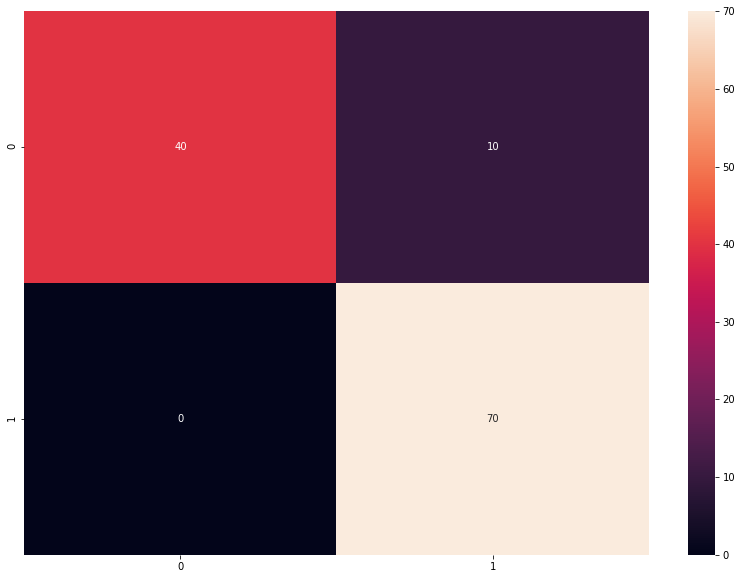

In [321]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(ytest, ypred)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [322]:
from sklearn.metrics import classification_report
 
num_classes = 2
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      0.80      0.89        50
     Class 1       0.88      1.00      0.93        70

    accuracy                           0.92       120
   macro avg       0.94      0.90      0.91       120
weighted avg       0.93      0.92      0.91       120

